In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("diabetes.csv")

df.head(10)

df.info()

df['Outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


C:\Users\chris\AppData\Local\Temp\ipykernel_30636\52905997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119:

<Axes: xlabel='BloodPressure', ylabel='Density'>

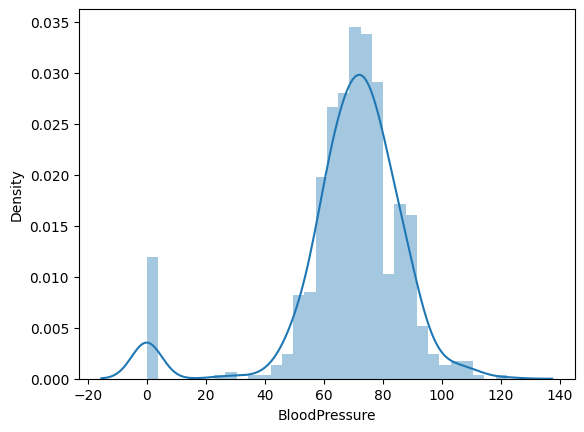

In [5]:
sns.distplot(df['BloodPressure'])

C:\Users\chris\AppData\Local\Temp\ipykernel_30636\1244122692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SkinThickness'])
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:111

<Axes: xlabel='SkinThickness', ylabel='Density'>

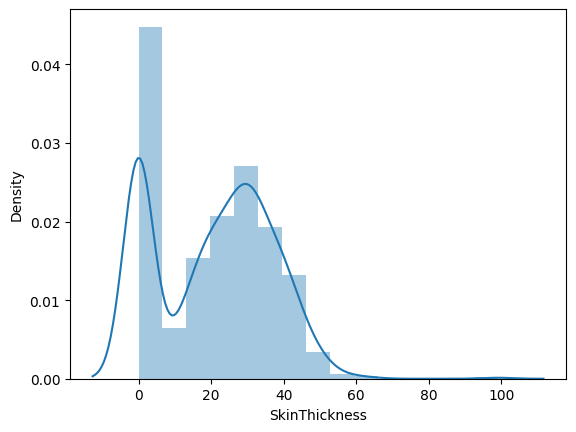

In [6]:
sns.distplot(df['SkinThickness'])

C:\Users\chris\AppData\Local\Temp\ipykernel_30636\1526206684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'])
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: Fut

<Axes: xlabel='Insulin', ylabel='Density'>

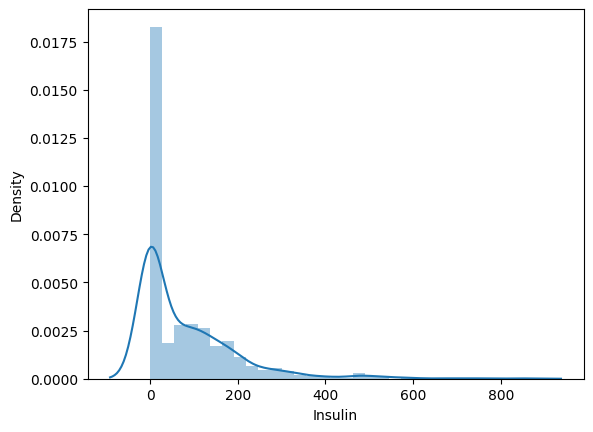

In [7]:
sns.distplot(df['Insulin'])

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Preprocessing

### Removing Outlying/Incomplete Data Points
There aren't many 0-glucose and 0-BMI data points, so such data points were removed.

As for the rest, there's quite a lot. Removing them would not be a good idea.


In [9]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
# removing 0-BP data points
#df= df[df['BloodPressure'] != 0]

# removing 0-skin thickness data points
#df= df[df['SkinThickness'] != 0]

# removing 0-BMI data points
df= df[df['BMI'] != 0]

# removing 0-glucose data points
df= df[df['Glucose'] != 0]

# removing 0-insulin data points
#df= df[df['Insulin'] != 0]

# removing incomplete data points leaves the data set with 392 remaining data points, meaning 376 data points have incomplete data in the above columns
# removing only 0-BMI and 0-glucose data points only removes 16, leaving the data set with 752 data points (from the original 768)
df.count()

Pregnancies                 752
Glucose                     752
BloodPressure               752
SkinThickness               752
Insulin                     752
BMI                         752
DiabetesPedigreeFunction    752
Age                         752
Outcome                     752
dtype: int64

### Imputing empty data points
Zero-glucose and zero-BMI data points were removed because there were few of them. There are still zero-values where they don't belong, though. For these, imputation with kNN was used.

In [11]:
df.eq(0).sum()

Pregnancies                 108
Glucose                       0
BloodPressure                28
SkinThickness               218
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     488
dtype: int64

In [12]:
from sklearn.impute import KNNImputer

# set all 0's in BP, skin thickness, glucose, insulin, and BMI as nulls
df.replace(0, np.nan, inplace=True)
df['Outcome'].replace(np.nan, 0, inplace=True)
df['Pregnancies'].replace(np.nan, 0, inplace=True)

imputer = KNNImputer(n_neighbors=113)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [13]:
'''
# A half-baked approach to finding the best k.
# Questionable and time-consuming, but it works.

possible_n = []
for i in range(df.shape[0]):
    i = i+1
    df = pd.read_csv("diabetes.csv")

    df.replace(0, np.nan, inplace=True)
    df['Outcome'].replace(np.nan, 0, inplace=True)
    df['Pregnancies'].replace(np.nan, 0, inplace=True)
    
    imputer = KNNImputer(n_neighbors=(i))
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    from sklearn.model_selection import train_test_split

    X = df[[
            'BloodPressure',
            'SkinThickness',
            'Age',
            'Pregnancies',
            'Glucose',
            'Insulin',
            'BMI',
            'DiabetesPedigreeFunction'
            ]]
    y = df[['Outcome']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5, 
                                                                    min_samples_split=2, 
                                                                    min_samples_leaf=1)
    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    f1 = f1_score(y_test, y_preds)

    possible_n.append((i, f1))

# apparently, 113 is the optimal k
optimal_n = max(possible_n, key=lambda item: item[1])
print(optimal_n)
'''

'\n# A half-baked approach to finding the best k.\n# Questionable and time-consuming, but it works.\n\npossible_n = []\nfor i in range(df.shape[0]):\n    i = i+1\n    df = pd.read_csv("diabetes.csv")\n\n    df.replace(0, np.nan, inplace=True)\n    df[\'Outcome\'].replace(np.nan, 0, inplace=True)\n    df[\'Pregnancies\'].replace(np.nan, 0, inplace=True)\n    \n    imputer = KNNImputer(n_neighbors=(i))\n    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)\n\n    from sklearn.model_selection import train_test_split\n\n    X = df[[\n            \'BloodPressure\',\n            \'SkinThickness\',\n            \'Age\',\n            \'Pregnancies\',\n            \'Glucose\',\n            \'Insulin\',\n            \'BMI\',\n            \'DiabetesPedigreeFunction\'\n            ]]\n    y = df[[\'Outcome\']]\n\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n    clf = DecisionTreeClassifier(random_state=0, criterion=\'entropy\', max

# Modelling

In [14]:
from sklearn.model_selection import train_test_split

X = df[[
        'BloodPressure',
        #'SkinThickness',
        'Age',
        #'Pregnancies',
        'Glucose',
        'Insulin',
        'BMI',
        'DiabetesPedigreeFunction'
        ]]
y = df[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5,
                                                                  max_leaf_nodes=17,
                                                                  min_samples_split=2, 
                                                                  min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=17,
                       random_state=0)

In [16]:
y_preds = clf.predict(X_test)

In [17]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.8079
Precision 0.7460
Recall 0.7833
F1 0.7642


# Visualizations

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
plot_tree(clf, 
          feature_names = list(X.columns),
          class_names = ['No Diabetes', 'Diabetes'],
          filled = True)
plt.show()

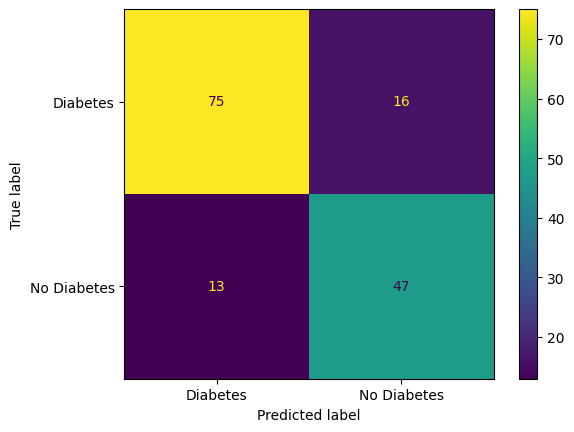

In [19]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Diabetes", "No Diabetes"])
cm_display.plot()
plt.show()

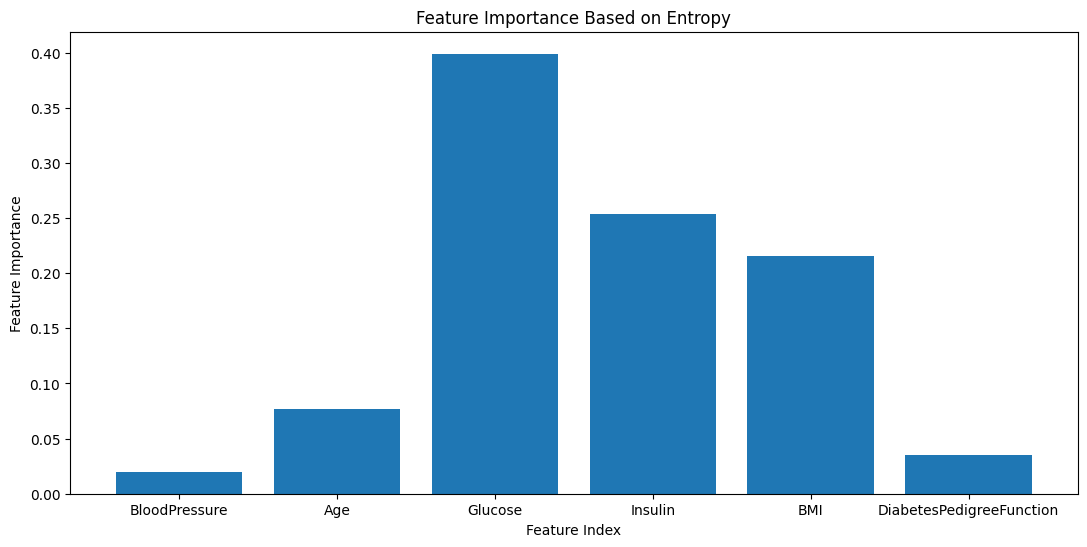

In [20]:
feature_importances = clf.feature_importances_

plt.figure(figsize=(13,6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=clf.feature_names_in_)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Based on Entropy')
plt.show()